In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [172]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2,MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

reading data

In [374]:
df = pd.read_csv('output_csv_directory/train_set2.csv')

In [375]:
X = df.drop('class', axis=1)# features
X = X.drop('timestamp', axis=1)# features
y = df['class'] # target value

data split

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [377]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
24,0.481358,0.579742,-1.313305,0.999959,0.511807,0.518029,-1.252761,0.999881,0.528025,0.517918,...,-0.008456,0.0,0.547418,0.501629,0.002855,0.0,0.551973,0.497450,0.002820,0.0
99,0.503047,0.702909,-1.392586,0.999787,0.529325,0.643126,-1.379059,0.999447,0.542058,0.641751,...,-0.030234,0.0,0.558252,0.634432,-0.020336,0.0,0.561941,0.629036,-0.021165,0.0
8,0.458189,0.569975,-0.722445,0.999787,0.487880,0.506028,-0.676155,0.999373,0.505248,0.504545,...,-0.006391,0.0,0.526275,0.507850,0.003414,0.0,0.531269,0.503040,0.003355,0.0
20,0.480593,0.588099,-1.394641,0.999939,0.510946,0.527103,-1.349718,0.999821,0.527095,0.527101,...,-0.007222,0.0,0.545122,0.510962,0.003845,0.0,0.550067,0.506805,0.003817,0.0
22,0.480517,0.583743,-1.190810,0.999950,0.510939,0.522466,-1.130262,0.999854,0.527194,0.522484,...,-0.008854,0.0,0.545598,0.507185,0.001997,0.0,0.550385,0.502994,0.001903,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.583514,0.665908,-1.171250,0.998645,0.600607,0.600556,-1.121177,0.996130,0.609383,0.596851,...,-0.012676,0.0,0.626019,0.590299,0.019117,0.0,0.628396,0.586617,0.020468,0.0
116,0.434811,0.691008,-0.821975,0.999707,0.457834,0.617716,-0.816456,0.999202,0.475496,0.612878,...,-0.024871,0.0,0.459434,0.603307,-0.034058,0.0,0.463809,0.596869,-0.036343,0.0
53,0.496581,0.559806,-1.059404,0.999989,0.517279,0.502766,-0.986943,0.999984,0.533184,0.502663,...,-0.002425,0.0,0.553034,0.483679,0.022436,0.0,0.557484,0.479411,0.023478,0.0
38,0.574796,0.577998,-1.581118,0.999987,0.596517,0.515694,-1.496446,0.999967,0.612295,0.514998,...,-0.009561,0.0,0.629703,0.503724,0.008265,0.0,0.634114,0.500695,0.008475,0.0


feature label encoding

In [378]:
happy = [1,0,0,0,0]
sad = [0,1,0,0,0]
insecure = [0,0,1,0,0]
closed = [0,0,0,1,0]
open = [0,0,0,0,1]
new_y_train = []
new_y_test = []

In [379]:
for i in y_train:
  if i=='happy':
    new_y_train.append(happy)
  if i=='sad':
    new_y_train.append(sad)
  if i=='insecure':
    new_y_train.append(insecure)
  if i=='closed':
    new_y_train.append(closed)
  if i=='open':
    new_y_train.append(open)

for i in y_test:
  if i=='happy':
    new_y_test.append(happy)
  if i=='sad':
    new_y_test.append(sad)
  if i=='insecure':
    new_y_test.append(insecure)
  if i=='closed':
    new_y_test.append(closed)
  if i=='open':
    new_y_test.append(open)

In [380]:
new_y_train = np.array(new_y_train)
new_y_test = np.array(new_y_test)

In [381]:
new_y_train

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0,

data scailing

In [382]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [383]:
X_train.shape

(109, 2004)

In [384]:
x_train = np.reshape(X_train,newshape=(X_train.shape[0],167,4,3))

In [ ]:
X_test.shape

(48, 2004)

In [ ]:
x_test = np.reshape(X_test,newshape=(X_test.shape[0],167,4,3))

bulding a model

In [343]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=120, kernel_size=1, activation='relu',input_shape=[167,4,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 167, 4, 120)       480       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 83, 2, 120)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 19920)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               2549888   
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                                 
Total params: 2,551,013
Trainable params: 2,551,013
Non-trainable params: 0
____________________________________________

callbacks

In [300]:
filepath="/saved_models/model_1.hdf5"
# checkpoint - saves the model weight when the accuracy improves during the training process
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
# early_stop - if the accuracy does not improves for 5 epochs the training will stop to avoid overfitting
early_stop = EarlyStopping(monitor='accuracy', patience=5, verbose=1)
callbacks_list = [checkpoint, early_stop]

In [301]:
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model training

In [302]:
history = cnn.fit(x = x_train, y = new_y_train, epochs= 20,callbacks=callbacks_list)

Epoch 1/20
3/4 [=====================>........] - ETA: 0s - loss: 0.8626 - accuracy: 0.5208
Epoch 1: accuracy improved from -inf to 0.57798, saving model to /saved_models\model_1.hdf5
4/4 [==============================] - 1s 46ms/step - loss: 0.7599 - accuracy: 0.5780
Epoch 2/20
3/4 [=====================>........] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.57798 to 1.00000, saving model to /saved_models\model_1.hdf5
4/4 [==============================] - 0s 49ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 3/20
3/4 [=====================>........] - ETA: 0s - loss: 2.9516e-06 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
4/4 [==============================] - 0s 41ms/step - loss: 2.6783e-06 - accuracy: 1.0000
Epoch 4/20
3/4 [=====================>........] - ETA: 0s - loss: 4.0978e-08 - accuracy: 1.0000
Epoch 4: accuracy did not improve from 1.00000
4/4 [==============================] - 0s 39ms/step - loss: 4.0466e-08 - accuracy

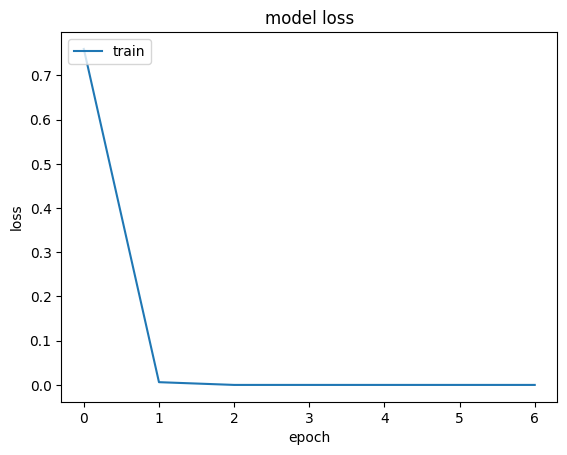

In [303]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

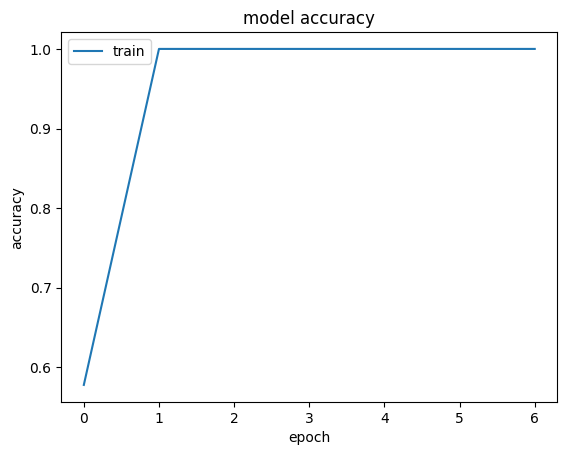

In [304]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.keras.models.save_model(cnn,'D:\Empower View\DS_EmpowerView\holistic_folder\saved_models\classy_model_1')

INFO:tensorflow:Assets written to: D:\Empower View\DS_EmpowerView\holistic_folder\saved_models\classy_model_1\assets


INFO:tensorflow:Assets written to: D:\Empower View\DS_EmpowerView\holistic_folder\saved_models\classy_model_1\assets


In [305]:
cnn.save("D:\Empower View\DS_EmpowerView\holistic_folder\saved_models\classy_model_1.h5")
model = tf.keras.models.load_model("D:\Empower View\DS_EmpowerView\holistic_folder\saved_models\classy_model_1.h5")
print(model)

In [306]:
weights = model.get_weights()
print(weights[:1][0][0][0][0][0])

0.06300278


loading best trained weights

In [58]:
import os
current_dir = current_dir = os.path.dirname(os.path.abspath(''))
print(current_dir)
# print(os.listdir(current_dir+'/holistic_folder/saved_models/classy_model_1'))
path = current_dir+'/holistic_folder/saved_models/classy_model_1'

d:\Empower View\DS_EmpowerView


In [63]:
cnn = tf.keras.models.load_model(path)

In [38]:
cnn.load_weights('/saved_models/model_1.hdf5')

In [64]:
new_y_test.shape

(489, 5)

In [307]:
model.evaluate(x=x_test,y=new_y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [324]:
singel_pred=X_test[2]
singel_pred = np.reshape(singel_pred,newshape=(1,167,4,3))
singel_pred.shape

(1, 167, 4, 3)

In [325]:
X_test[1]

array([ 0.15599529,  0.92100708, -0.32539787, ...,  1.06036088,
       -0.4675825 ,  0.        ])

In [326]:
new_y_test[1]

array([0, 0, 0, 0, 1])

In [327]:
len(X_test)

48

In [328]:
result = model.predict(singel_pred)

1/1 [==============================] - 0s 19ms/step


In [329]:
result.shape

(1, 5)

In [330]:
j=0
p=2
a=0
for i in result[0]:
  if(p!=2):
    if(i>p):
      p=i
      a=j
  else:
    p=i
  j=j+1

if a==0:
  print('class happy ',p)
if a==1:
  print('class sad ',p)
if a==2:
  print('class insecure ',p)
if a==3:
  print('class closed ',p)
if a==4:
  print('class open ',p)

class open  1.0


In [331]:
print('1',result[0][0])
print('2',result[0][1])
print('3',result[0][2])
print('4',result[0][3])
print('5',result[0][4])

1 2.1456427e-15
2 3.9301938e-26
3 1.179797e-26
4 7.7539786e-38
5 1.0


In [77]:
l=[]

In [78]:
l.append([0.9,0.2,0.4,0.1,0.04])

In [79]:
x = ['asdfsdfsdf']

In [80]:
len(x)

1

In [81]:
columns_names = ['heppy','sad','insecure','closed','open']
to_save = pd.DataFrame(columns=columns_names)

In [82]:
result[0]

array([9.7924401e-04, 3.3386168e-06, 9.9901330e-01, 4.0928844e-06,
       1.6908462e-08], dtype=float32)

In [83]:
#df = pd.read_csv('/content/drive/MyDrive/classy/dataset/train_set.csv')
#X = df.drop('class', axis=1)
for i in range(480):
  arr = np.array(X)
  pred = arr[i]
  pred = np.reshape(pred,newshape=(-1,1))
  sc = StandardScaler()
  input = sc.fit_transform(pred)
  input = np.reshape(input,newshape=(1,167,4,3))
  result = cnn.predict(input)
  new_row = []
  for j in result[0]:
    new_row.append(j)
  to_save.loc[len(to_save)] = new_row
to_save.to_csv(path_or_buf='/content/drive/MyDrive/classy/pred2.csv',)

1/1 [==============================] - 0s 17ms/step


In [84]:
to_save

,heppy,sad,insecure,closed,open
0,0.016982,0.983005,1.096671e-05,2.014252e-06,1.067276e-08
1,0.266373,0.733615,4.283432e-06,7.509889e-06,1.601069e-07
2,0.513716,0.486273,2.694353e-06,8.882048e-06,3.353613e-07
3,0.668029,0.331959,1.899292e-06,1.005815e-05,4.304274e-07
4,0.712511,0.287478,1.436767e-06,9.007385e-06,4.724639e-07
...,...,...,...,...,...
475,0.006705,0.993294,5.891185e-07,3.925805e-07,1.775044e-09
476,0.006357,0.993642,7.703915e-07,4.465016e-07,1.613620e-09
477,0.004467,0.995531,8.447248e-07,4.169215e-07,1.078176e-09
478,0.005444,0.994555,1.042830e-06,4.964676e-07,1.419588e-09
